In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('hayden_cleaned_data.csv' ,index_col = 0)

In [4]:
data.sort_values(by = ["playerid", "Season"],inplace = True)


In [5]:
mask = (data.Leave == 1)
data_leave = data[mask]
#data_leave.insert(0,"target","retired")
#data_leave.sort()
data_leave.head()

SP  RP  FD  C   target  playerid  Season  Stay_Length  Career_Length  \
13277   0   0   1  0  Marlins         1    2004            2              2   
12884   0   0   1  0  retired         1    2009            4              6   
7825    0   0   1  0   Braves         2    2008            7              7   
14889   0   0   1  0  Dodgers         2    2009            1              8   
15069   0   0   1  0  retired         2    2010            1              9   

       GS  ...    Expos  Rockies  Athletics  Reds  Pirates  Rays  Orioles  \
13277   0  ...        0        0          0     0        0     0        0   
12884   0  ...        0        0          0     0        0     0        0   
7825    0  ...        0        0          0     0        0     0        0   
14889   0  ...        0        0          0     0        0     0        0   
15069   0  ...        0        0          0     0        0     0        0   

       Rangers  Devil Rays  Leave  
13277        0           0      1  
12884        0           0      1  
7825         0           0      1  
14889        0           0      1  
15069        0           0      1  

[5 rows x 47 columns]

In [6]:
from keras.utils import np_utils

Using TensorFlow backend.


In [7]:
team_names = data.target.unique()
id_team = {names:i for i,names in enumerate (team_names)}
data_leave.target = data_leave.target.apply(lambda x : id_team[x])
data_leave.head(10)

C:\Users\Joseph\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


SP  RP  FD  C  target  playerid  Season  Stay_Length  Career_Length  \
13277   0   0   1  0       1         1    2004            2              2   
12884   0   0   1  0       0         1    2009            4              6   
7825    0   0   1  0       2         2    2008            7              7   
14889   0   0   1  0       3         2    2009            1              8   
15069   0   0   1  0       0         2    2010            1              9   
2509    1   0   0  0       0         3    2003            2              2   
8458    0   0   0  1       0         6    2004            1              1   
12455   0   0   0  1       0         6    2008            2              3   
6752    0   0   1  0       4        10    2004            3              3   
9363    0   0   1  0       5        10    2007            3              6   

       GS  ...    Expos  Rockies  Athletics  Reds  Pirates  Rays  Orioles  \
13277   0  ...        0        0          0     0        0     0        0   
12884   0  ...        0        0          0     0        0     0        0   
7825    0  ...        0        0          0     0        0     0        0   
14889   0  ...        0        0          0     0        0     0        0   
15069   0  ...        0        0          0     0        0     0        0   
2509   19  ...        0        0          0     0        0     0        0   
8458    0  ...        0        0          0     0        0     0        0   
12455   0  ...        0        0          0     0        0     0        0   
6752    0  ...        0        0          0     0        0     0        0   
9363    0  ...        0        0          0     0        0     0        0   

       Rangers  Devil Rays  Leave  
13277        0           0      1  
12884        0           0      1  
7825         0           0      1  
14889        0           0      1  
15069        0           0      1  
2509         0           0      1  
8458         0           0      1  
12455        0           0      1  
6752         0           0      1  
9363         0           0      1  

[10 rows x 47 columns]

In [7]:
data_leave.GS.describe()

count    7488.000000
mean        3.703392
std         8.749365
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        36.000000
Name: GS, dtype: float64

# 2 Tasks

1. "copying and pasting the code here"
2. "Finding the right answer" 
    Start from the classifier/machine learning stuff
    x is all the feautres
    y is the dependent variable -> the team they go to
    find examples of multi-classification

# From Random Forrests

In [8]:
#Let's hope this works somewhat

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
#from sklearn import svms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

In [27]:
print(id_team)

{'retired': 0, 'Marlins': 1, 'Braves': 2, 'Dodgers': 3, 'Cardinals': 4, 'Blue Jays': 5, 'Padres': 6, 'White Sox': 7, 'Astros': 8, 'Diamondbacks': 9, 'Athletics': 10, 'Nationals': 11, 'Mariners': 12, 'Tigers': 13, 'Giants': 14, 'Yankees': 15, 'Rays': 16, 'Reds': 17, 'Indians': 18, 'Royals': 19, 'Rangers': 20, 'Phillies': 21, 'Pirates': 22, 'Orioles': 23, 'Brewers': 24, 'Angels': 25, 'Rockies': 26, 'Cubs': 27, 'Red Sox': 28, 'Twins': 29, 'Mets': 30, 'Expos': 31, 'Devil Rays': 32}


In [39]:
mask_retire = (data_leave.target == 0)
data_noretire = data_leave[~mask_retire]
mask_gs = (data_leave.G >= 1)
data_noretire = (data_leave[mask_gs])
#mask_length = (data_leave.Stay_Length >= 2)
#data_noretire = (data_leave[mask_length])
data_noretire

SP  RP  FD  C  target  playerid  Season  Stay_Length  Career_Length  \
13277   0   0   1  0       1         1    2004            2              2   
12884   0   0   1  0       0         1    2009            4              6   
7825    0   0   1  0       2         2    2008            7              7   
14889   0   0   1  0       3         2    2009            1              8   
15069   0   0   1  0       0         2    2010            1              9   
2509    1   0   0  0       0         3    2003            2              2   
8458    0   0   0  1       0         6    2004            1              1   
12455   0   0   0  1       0         6    2008            2              3   
6752    0   0   1  0       4        10    2004            3              3   
9363    0   0   1  0       5        10    2007            3              6   
11624   0   0   1  0       6        10    2008            1              7   
12854   0   0   1  0       6        10    2008            1              7   
7361    0   0   1  0       0        10    2010            2              9   
12404   0   0   1  0       7        11    2006            5              5   
9359    0   0   1  0       8        11    2007            1              6   
9360    0   0   1  0       8        11    2007            1              6   
9361    0   0   1  0       8        11    2007            1              6   
13600   0   0   1  0       0        11    2009            2              8   
13601   0   0   1  0       0        11    2009            2              8   
13599   0   0   0  1       0        12    2002            1              1   
13870   0   0   0  1       0        12    2002            1              1   
8644    0   0   1  0       0        13    2003            2              2   
14848   0   0   1  0       0        14    2003            2              2   
14849   0   0   1  0       0        14    2003            2              2   
7552    0   0   1  0       9        15    2004            3              3   
5385    0   0   1  0       5        15    2005            1              4   
5772    0   0   1  0       4        15    2007            2              6   
4509    0   0   1  0       2        15    2008            1              7   
12212   0   0   1  0       0        15    2010            1              8   
3266    0   1   0  0       0        18    2011            2              2   
...    ..  ..  .. ..     ...       ...     ...          ...            ...   
8885    0   0   1  0       0     17350    2017            1              1   
1743    1   0   0  0       0     17432    2017            1              1   
2459    1   0   0  0       0     17526    2017            1              1   
12593   0   0   1  0       0     17528    2015            1              1   
12043   0   0   1  0       0     17642    2017            1              1   
4976    0   0   1  0       0     17678    2017            2              2   
4977    0   0   1  0       0     17678    2017            2              2   
6359    0   0   1  0       0     17901    2017            2              2   
6360    0   0   1  0       0     17901    2017            2              2   
6961    0   0   1  0       0     17919    2017            1              1   
6962    0   0   1  0       0     17919    2017            1              1   
6963    0   0   1  0       0     17919    2017            1              1   
6964    0   0   1  0       0     17919    2017            1              1   
13254   0   0   1  0       0     17932    2017            1              1   
5510    0   0   1  0       0     18015    2017            1              1   
5511    0   0   1  0       0     18015    2017            1              1   
11847   0   0   1  0       0     18030    2017            1              1   
11479   0   0   1  0       0     18289    2017            1              1   
11605   0   0   1  0       0     18314    2017            2              2   
11942   0   0   1  0       0 

In [30]:
data.Career_Length.describe()

count    15260.000000
mean         3.918218
std          2.865648
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         16.000000
Name: Career_Length, dtype: float64

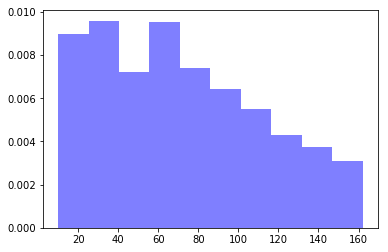

In [31]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
  
# the histogram of the data
n, bins, patches = plt.hist(data_noretire.G,  normed=1, facecolor='blue', alpha=0.5)
 
plt.show()

In [32]:
X = data_noretire[['SP','RP','FD','C','Stay_Length', 'Career_Length', 'GS', 'G', 'Inn']]#list(p.Team.unique())+


#y = data[['Diamondbacks','Royals','Dodgers','Phillies','Brewers','Cubs','Tigers','Giants','Red Sox','Indians','Twins','Blue Jays','White Sox','Padres','Cardinals','Mets','Braves','Expos','Rockies','Marlins','Astros','Nationals','Yankees','Mariners','Angels','Athletics','Reds','Pirates','Rays','Orioles','Rangers','Devil Rays']]
y = np_utils.to_categorical(data_noretire.target,33)
u = data_noretire.target 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rf = RandomForestClassifier()

# Choose some parameter combinations to try
#parameters = {'n_estimators': [9, 25, 40],
 #             'max_features': ['log2', 'sqrt','auto'], 
#             'criterion': ['entropy', 'gini'],
#              'max_depth': [10, 3, 5, 15], 
#             'min_samples_split': [3, 5, 8],
#              'min_samples_leaf': [5, 1,8]
#             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
#grid_obj = GridSearchCV(rf, parameters, n_jobs=4)#, scoring=acc_scorer)
#grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
#rf = grid_obj.best_estimator_


rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [34]:
accuracy_score(y_test, rf.predict(X_test))

0.30440587449933243

In [152]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier(random_state=0)
#iris = load_iris()
tree = rf.fit(data_noretire, data_noretire.target)
tree.predict(data_noretire) 

array([1, 0, 2, ..., 0, 0, 0], dtype=int64)

In [154]:
tree.getstate()

AttributeError: 'RandomForestClassifier' object has no attribute 'getstate'

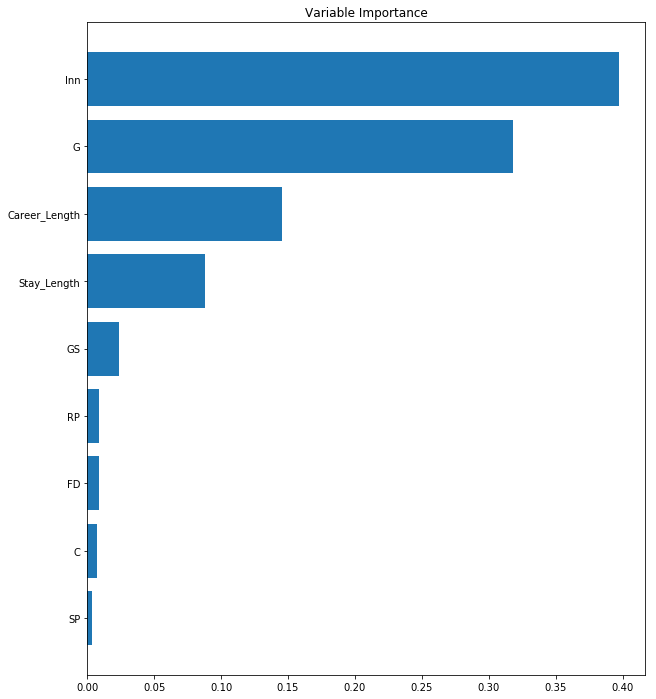

In [23]:
ind = np.argsort(rf.feature_importances_)
plt.figure(figsize=(10,12))

plt.barh(range(len(rf.feature_importances_)),rf.feature_importances_[ind])
# It is very important that you use the same columns that you fit your model with, or else this will be wrong!
plt.yticks(range(len(rf.feature_importances_)),X_train.columns[ind])
plt.title("Variable Importance")
plt.show()

In [35]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

et = ExtraTreesClassifier()

# Choose some parameter combinations to try
#parameters = {'n_estimators': [9, 4, 6],
 #             'max_features': ['log2', 'sqrt','auto'], 
  #            'criterion': ['entropy', 'gini'],
   #           'max_depth': [10, 2, 3, 5], 
    #          'min_samples_split': [2, 3, 5],
     #         'min_samples_leaf': [5, 1,8]
      #       }

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
#grid_obj = GridSearchCV(et, parameters, n_jobs=4)#, scoring=acc_scorer)
#grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
#et = grid_obj.best_estimator_


et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [36]:
accuracy_score(y_test, et.predict(X_test))

0.31731197151757901

In [37]:
X_train, X_test, u_train, u_test = train_test_split(X, u, test_size=0.3)

logreg = LogisticRegression()
logreg.fit(X_train, u_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
accuracy_score(u_test, logreg.predict(X_test))

0.52069425901201605

In [81]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

ab = AdaBoostClassifier()

# Choose some parameter combinations to try
#parameters = {'n_estimators': [9, 4, 6],
#              'max_features': ['log2', 'sqrt','auto'], 
 #             'criterion': ['entropy', 'gini'],
  #            'max_depth': [10, 2, 3, 5], 
   #           'min_samples_split': [2, 3, 5],
    #          'min_samples_leaf': [5, 1,8]
     #        }

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
#grid_obj = GridSearchCV(ab, parameters, n_jobs=4)#, scoring=acc_scorer)
#grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
#ab = grid_obj.best_estimator_


ab.fit(X_train, u_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [82]:
accuracy_score(u_test, ab.predict(X_test))

0.46995994659546059

In [83]:
import networkx as nx

In [98]:
G = nx.Graph()

In [138]:
G.add_nodes_from(id_team)

In [139]:
#len(id_team)
    #G.add_edge(id_team,id_team)
#id_team.values[4]
#a = 'marlins'
for key in id_team:
    a = key
    for key in id_team:
        G.add_edge(a,key)
        #print(a)

C:\Users\Joseph\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Joseph\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Joseph\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Joseph\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

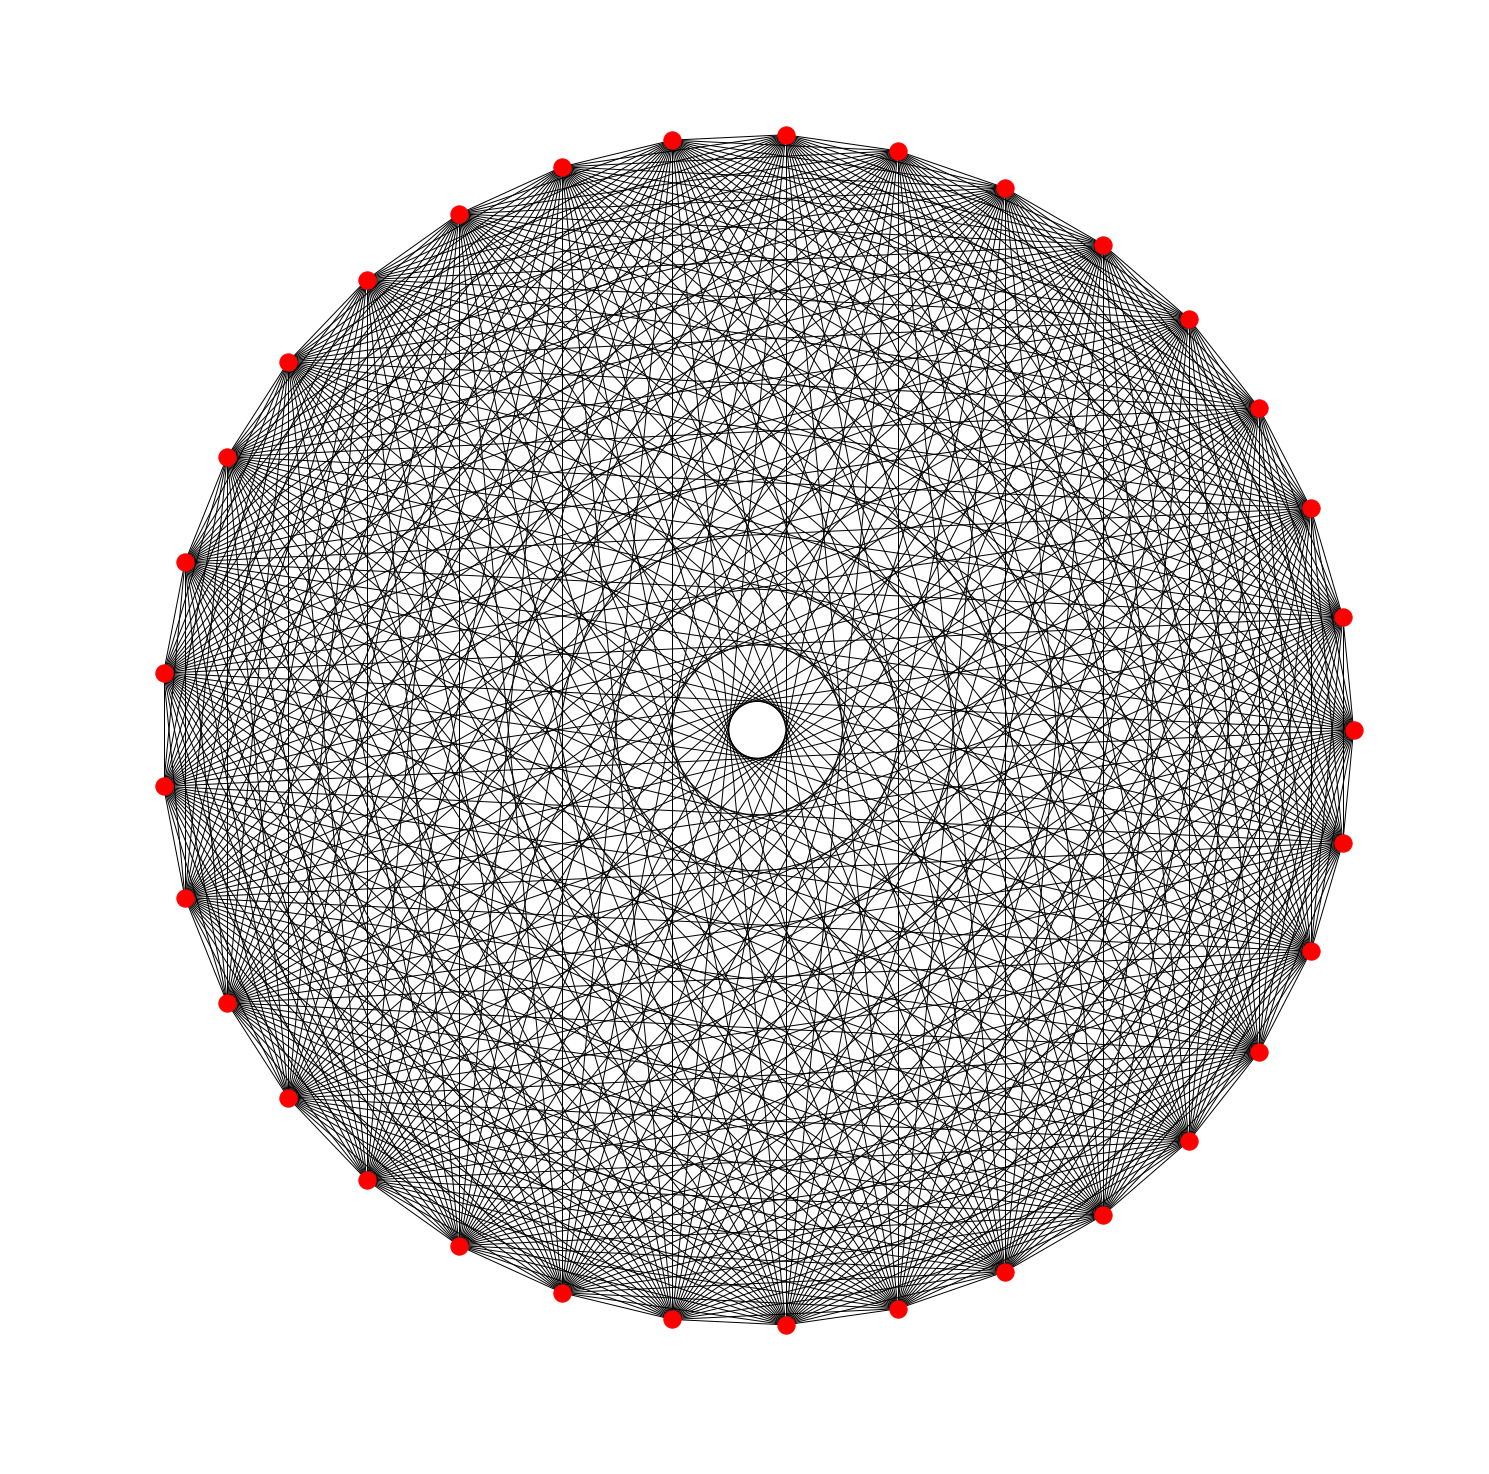

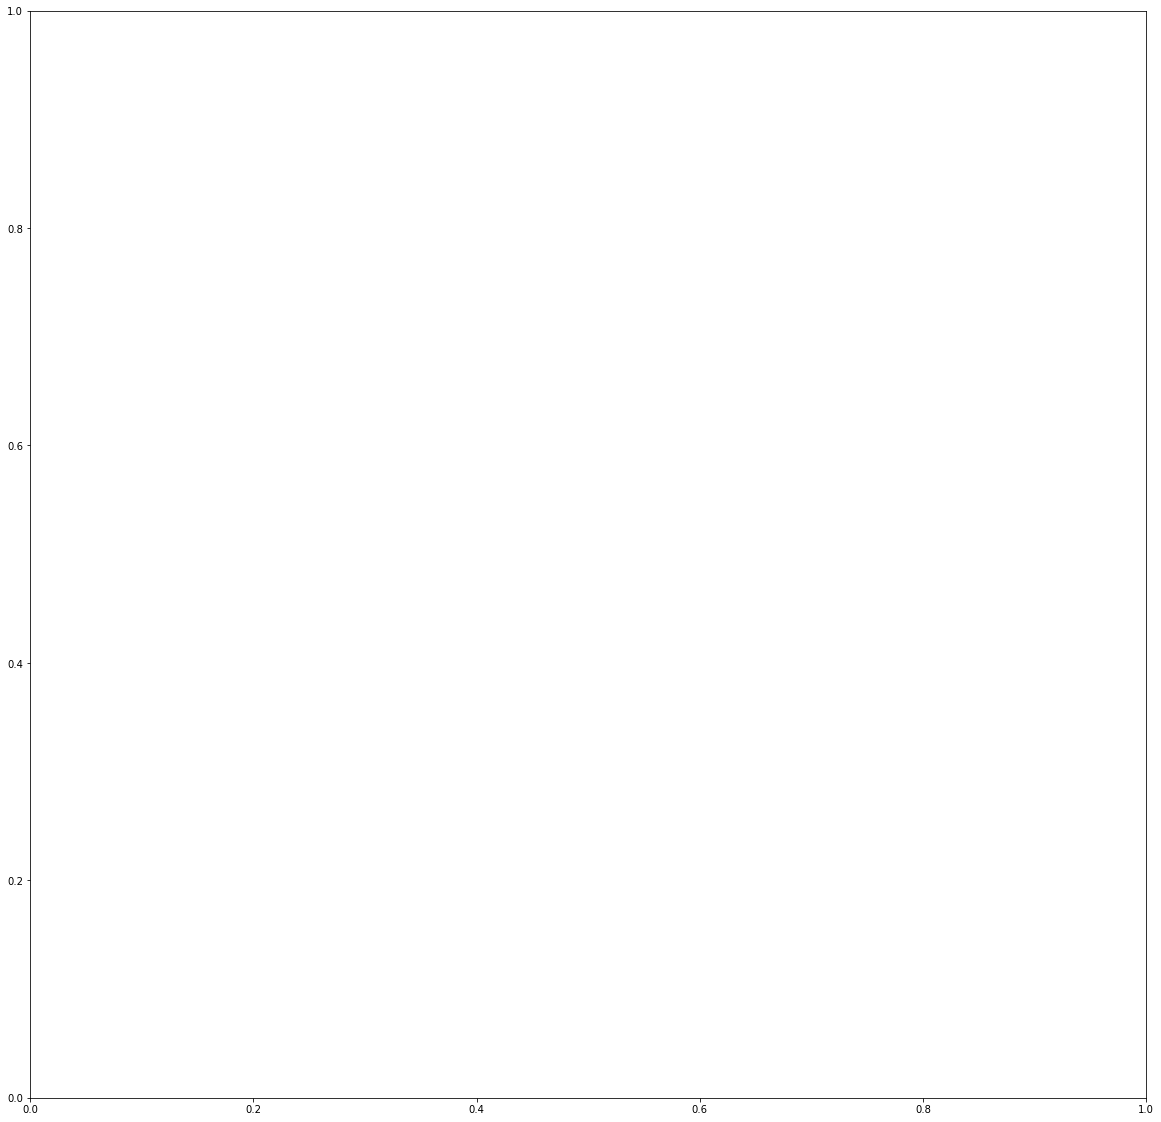

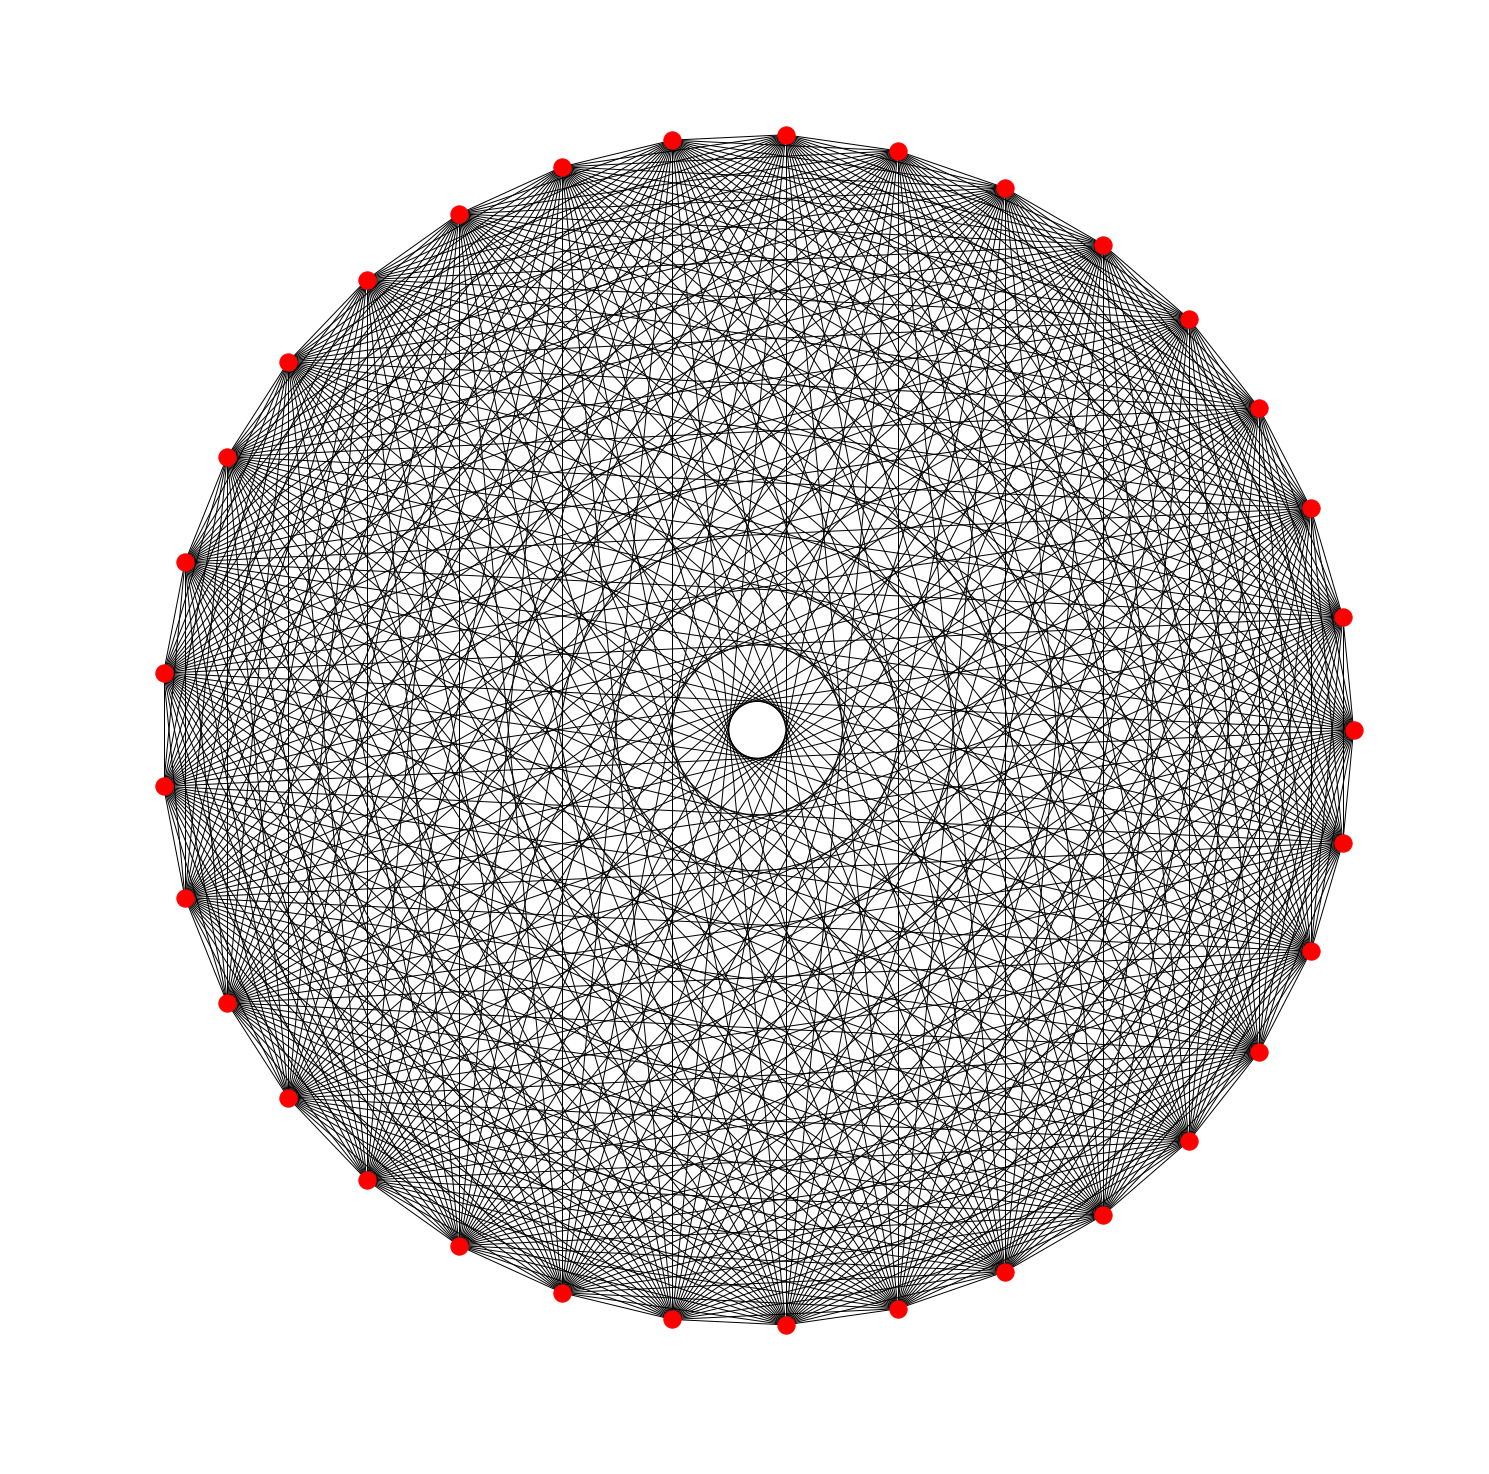

In [149]:
#G.clear()
plt.figure(figsize=(20,20))
nx.draw_circular(G)
#nx.draw_networkx_labels(G,[id_team])
plt.show()

In [ ]:
G.clear()


A pretty awesome looking network of where all teams and where they could go. A bit of a useless visual, buttttt it looks cool and could be good for the presentation